### This portion is to verify the optimal value of K using kneed library. Run the first cell if you wish to verify your assumption of K is correct

In [ ]:
# !pip install kneed #
# !pip install kneed[plot] #

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns



## Load Dataset

In [2]:
wine_df =pd.read_csv('wine.csv')
wine_df.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Pairplot

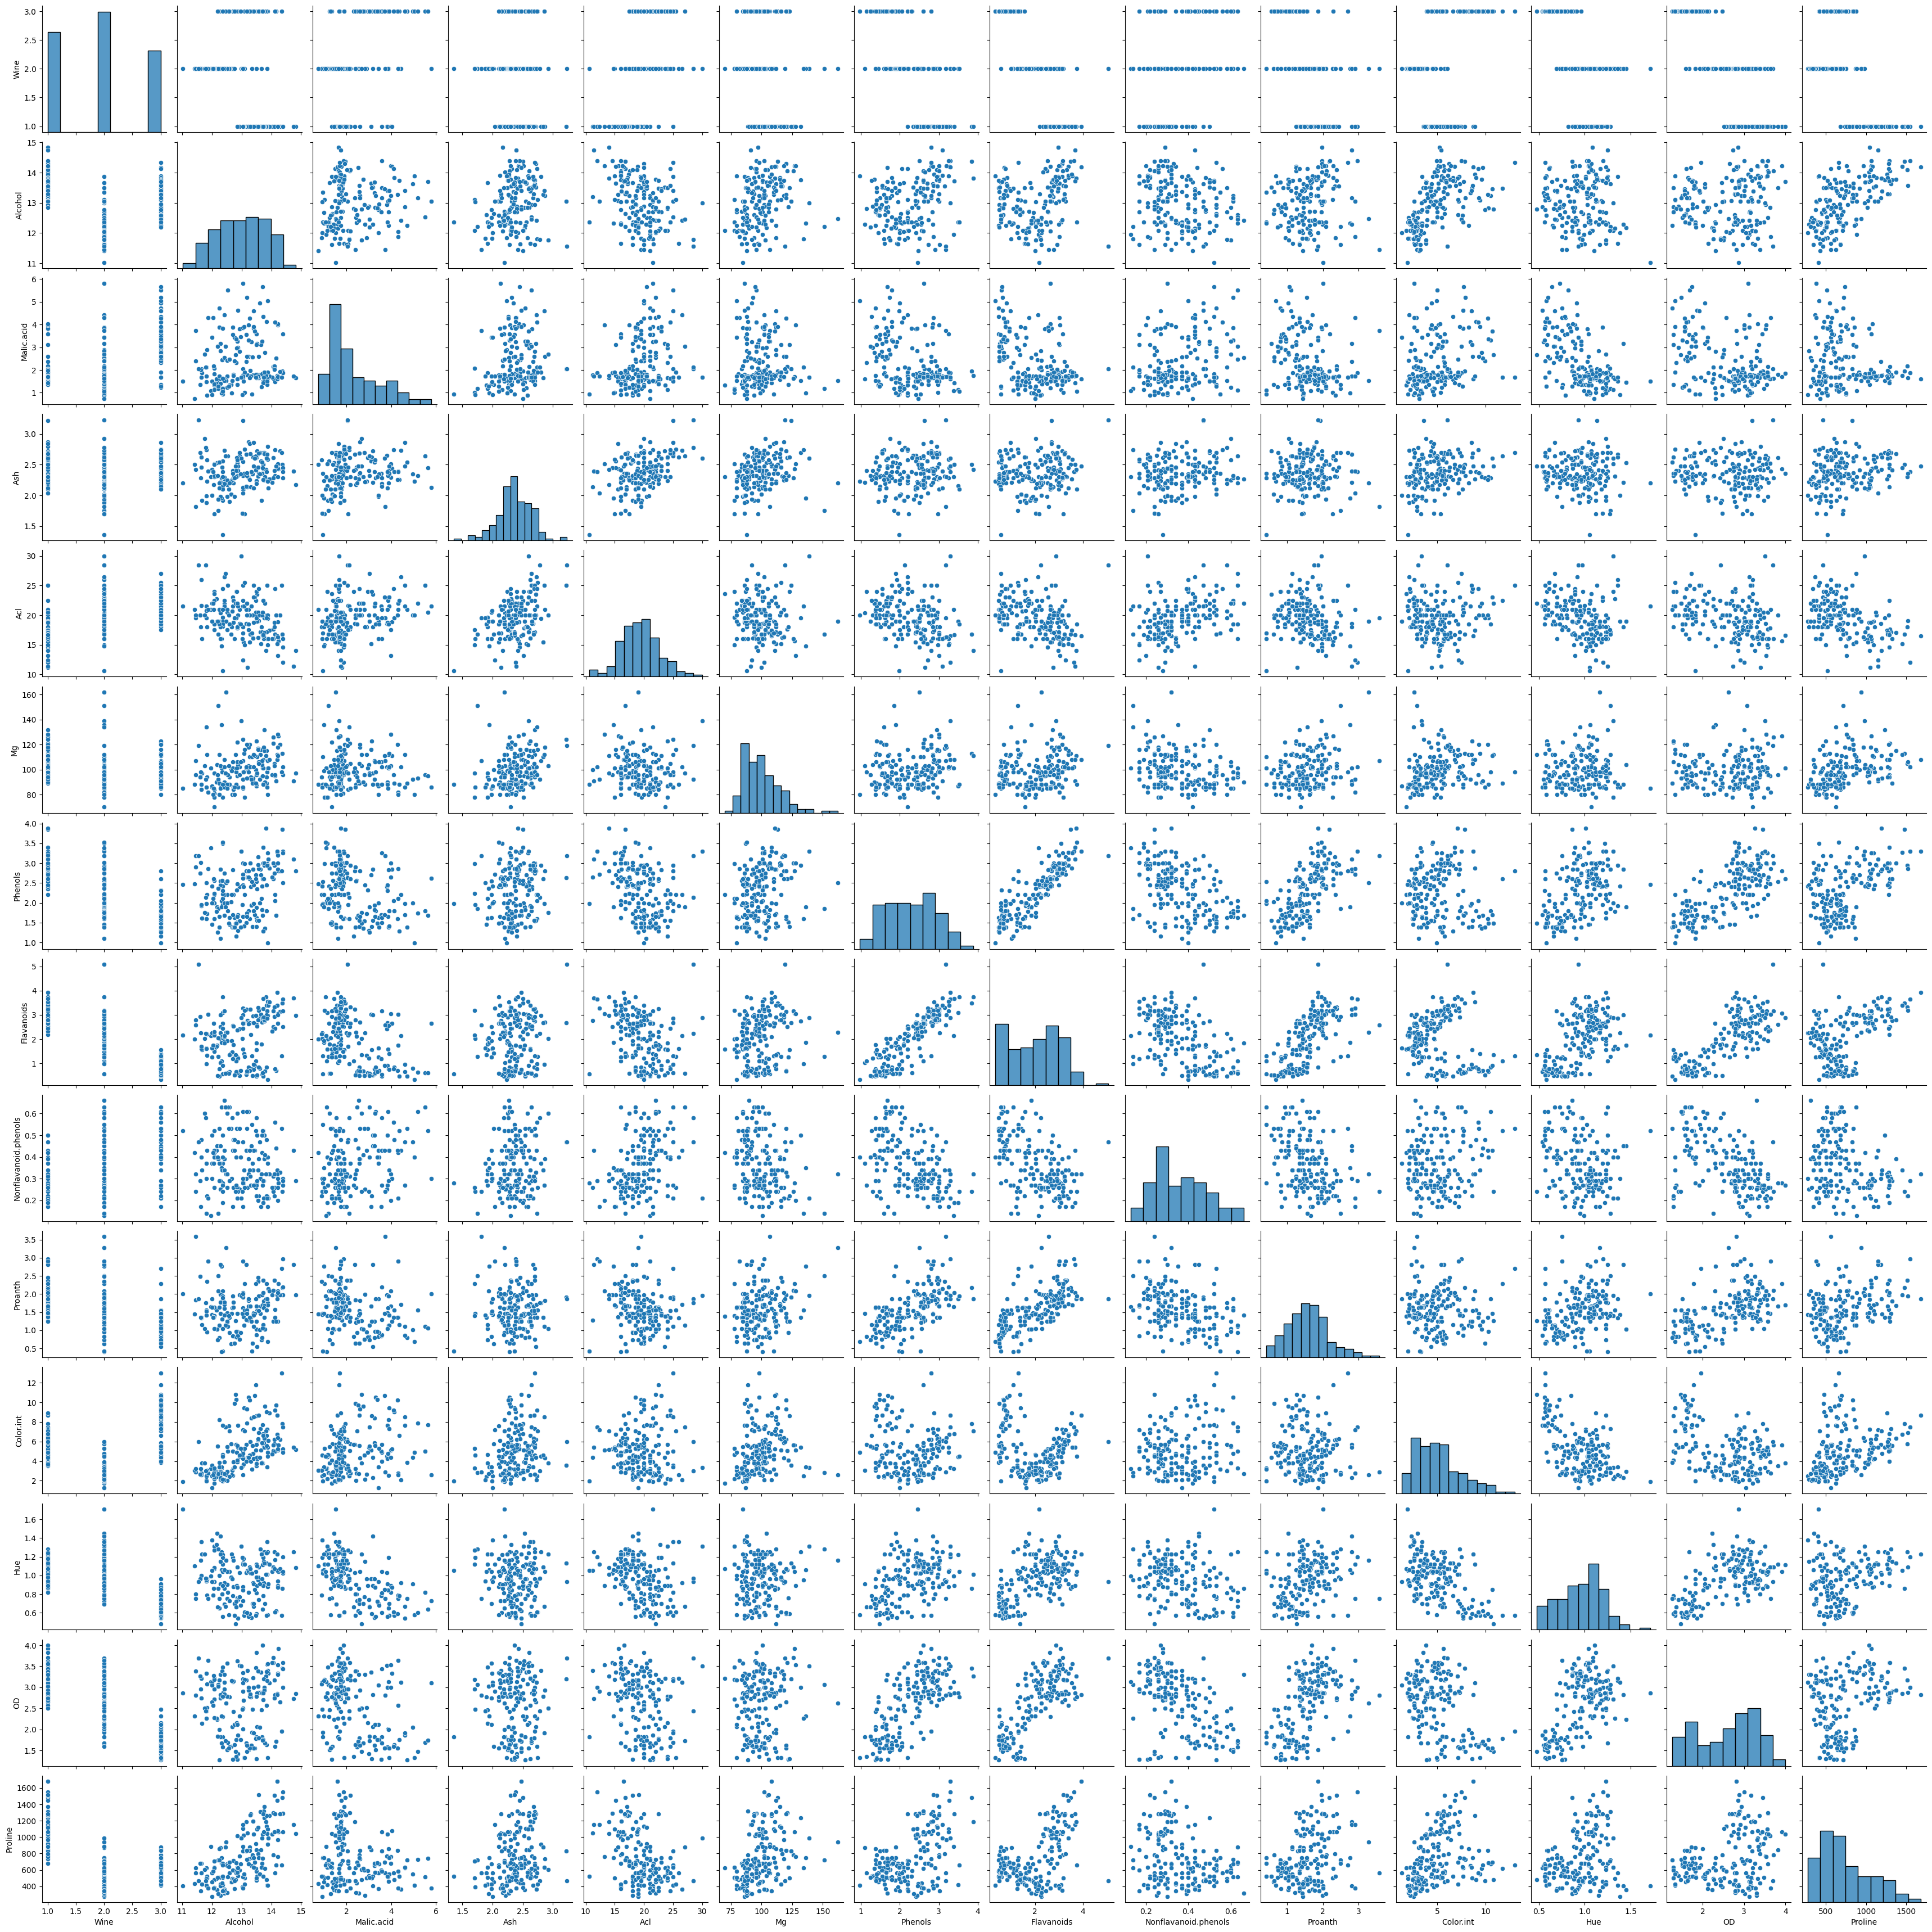

In [ ]:
sns.pairplot(wine_df)
plt.show()

## Info

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Describe

In [4]:
wine_df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Class distribution of Wine

In [5]:
counts = wine_df['Wine'].value_counts()
counts

,count
Wine,
2,71
1,59
3,48


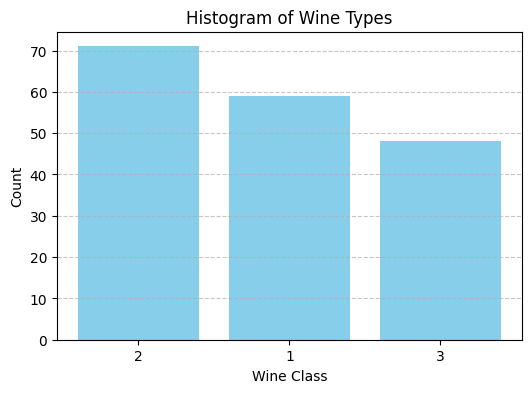

In [6]:
plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values, color='skyblue')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Histogram of Wine Types')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Get features and labels

In [10]:
X = wine_df.drop('Wine', axis=1)
y = wine_df['Wine']


# K-Means Clustering

For k = 2 After 20 iterations: Error = 4543749.6145

For k = 3 After 20 iterations: Error = 2370689.6868

For k = 4 After 20 iterations: Error = 1341379.5701

For k = 5 After 20 iterations: Error = 916379.1872

For k = 6 After 20 iterations: Error = 647326.0020

For k = 7 After 20 iterations: Error = 414752.8738

For k = 8 After 20 iterations: Error = 323223.2471



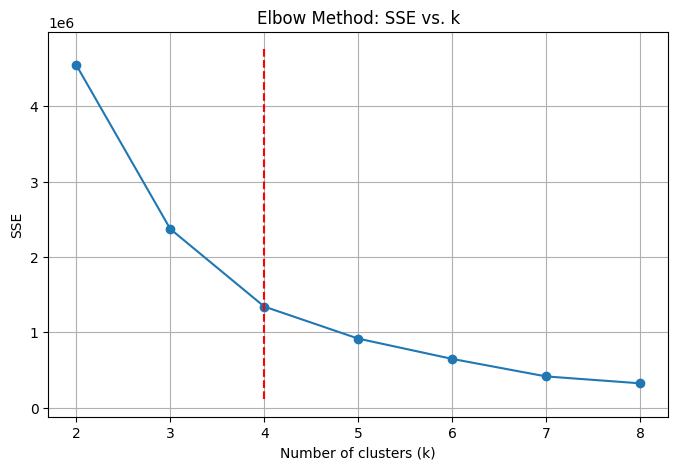

In [11]:

k_range = range(2, 9)

sse_values = []


for k in k_range:
    kmeans = KMeans(n_clusters=k,init='random',n_init='auto',max_iter=300,random_state=42)
    kmeans.fit(X)
    sse = kmeans.inertia_  # sum of squared distances to centroids
    sse_values.append(sse)
    print(f"For k = {k} After 20 iterations: Error = {sse:.4f}\n")

# Plot SSE vs. k for the elbow method
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), sse_values, marker='o', linestyle='-')
plt.xticks(list(k_range))
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method: SSE vs. k')
plt.vlines(4, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')  # Add vertical line at k=3
plt.grid(True)
plt.show()


By analyzing the graph, we can see there's a  decline of SSE value from K=
4 to 5.

## K-Means with K = 4 clusters

In [12]:
k = 4

kmeans_opt = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=300, random_state=42)
labels = kmeans_opt.fit_predict(X)


In [13]:
print(np.unique(labels))


[0 1 2 3]


## PCA to visualize clusters only (not used earlier)

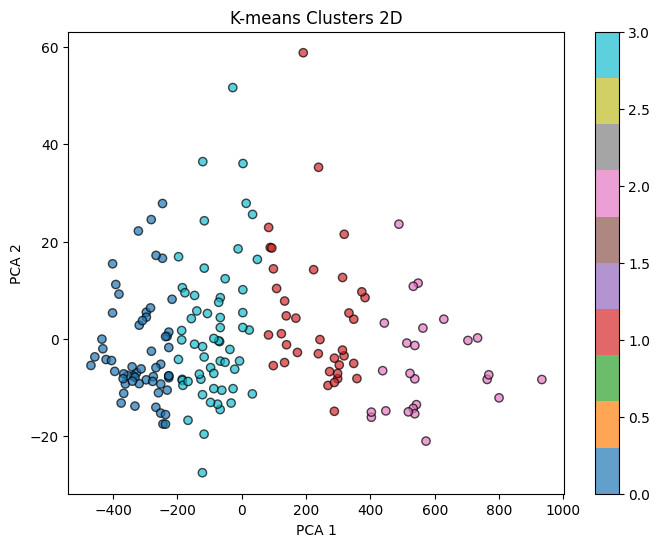

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# plt.figure(figsize=(8,6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7, edgecolor='k')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title('K-means Clusters 2D')
# plt.colorbar()
# plt.show()


## Verification with Kneed (Optionall)

In [ ]:

# import kneed


# kn = kneed.KneeLocator(k_range, sse_values, S=1.0, curve="convex", direction="decreasing")
# print(f"Optimal k (knee point): {kn.knee}")

# plt.figure(figsize=(8, 5))
# plt.plot(k_range, sse_values, marker='o', linestyle='-')
# plt.xticks(k_range)
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('SSE')
# plt.title('Elbow Method with Knee Point')
# plt.grid(True)
# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')  # Add vertical line at the knee
# plt.show()



In [ ]:
#

# Agglomerative Hierachial Clustering

## Single-link hierachical clustering

In [16]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [17]:
single_link_clusters = linkage(X, method='single', metric='euclidean')

Entire dendogram

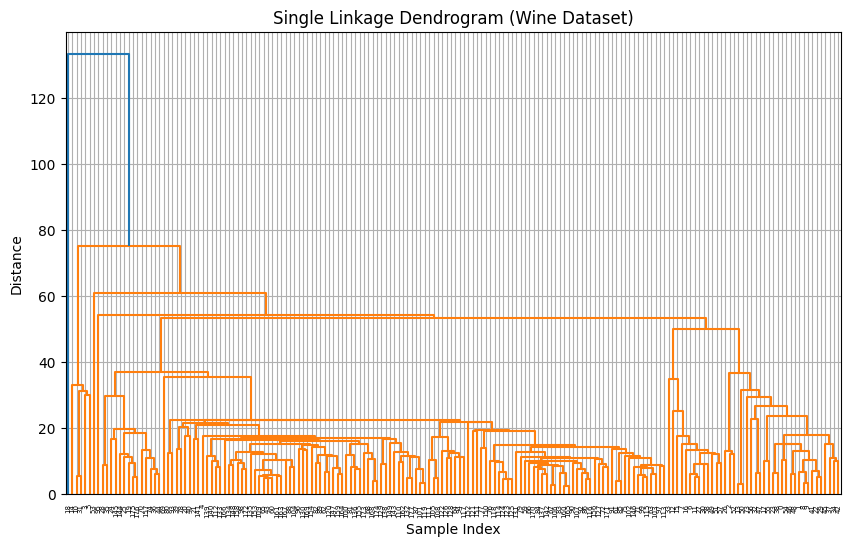

In [18]:
plt.figure(figsize=(10, 6))
dendrogram(single_link_clusters, truncate_mode='level')
plt.title('Single Linkage Dendrogram (Wine Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [ ]:
#shows the last five merges

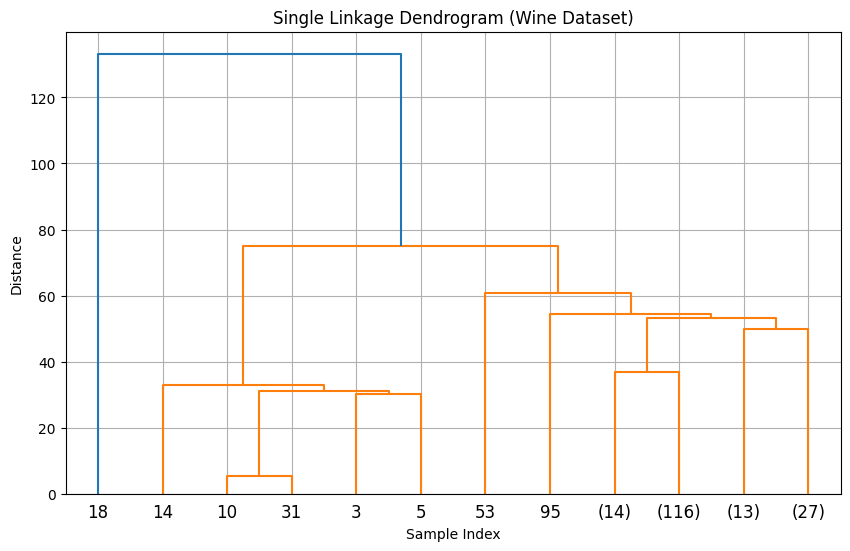

In [19]:
plt.figure(figsize=(10, 6))
dendrogram(single_link_clusters, truncate_mode='level', p=5)
plt.title('Single Linkage Dendrogram (Wine Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [20]:
labels_single = fcluster(single_link_clusters, t=4, criterion='maxclust')

silhouette_single = silhouette_score(X, labels_single)
print(f"Single Link Clustering: Silhouette Coefficient for k=4: {silhouette_single:.4f}")

Single Link Clustering: Silhouette Coefficient for k=4: 0.3935


## Complete Link Hierarchial Clustering

In [21]:
complete_link_clusters = linkage(X, method='complete', metric='euclidean')

In [ ]:
#entire dendogram

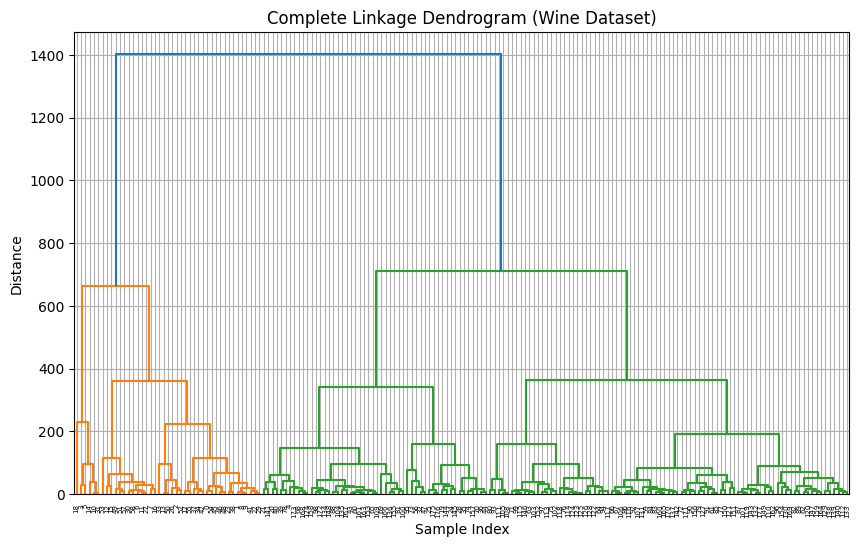

In [22]:
plt.figure(figsize=(10, 6))
dendrogram(complete_link_clusters, truncate_mode='level',)
plt.title('Complete Linkage Dendrogram (Wine Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [ ]:
# shows last five splits

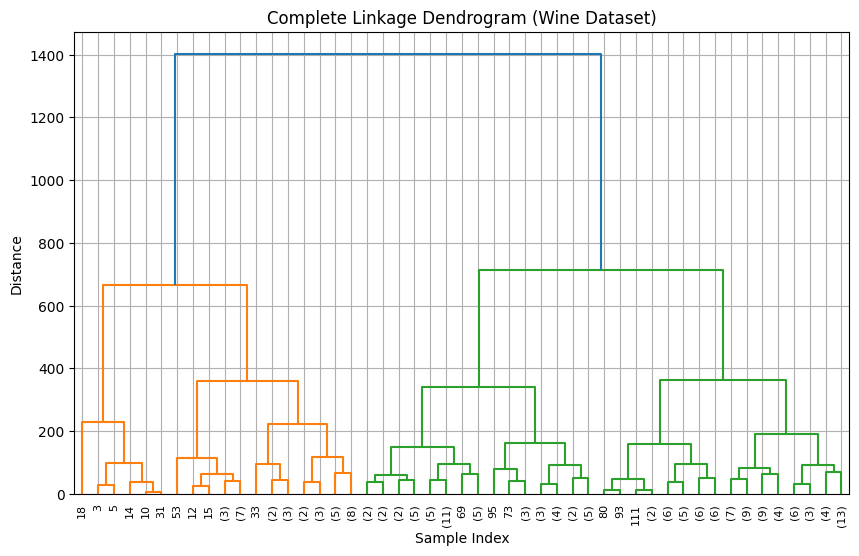

In [23]:
plt.figure(figsize=(10, 6))
dendrogram(complete_link_clusters, truncate_mode='level', p=5)
plt.title('Complete Linkage Dendrogram (Wine Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [24]:
# Step 4b: Cut dendrogram to form k=4 clusters
labels_complete = fcluster(complete_link_clusters, t=4, criterion='maxclust')

# Step 5b: Calculate silhouette coefficient
silhouette_complete = silhouette_score(X, labels_complete)
print(f"Complete Link Clustering: Silhouette Coefficient for k=4: {silhouette_complete:.4f}")

Complete Link Clustering: Silhouette Coefficient for k=4: 0.5336
